# EDA for the considered systems

The goal of this notebook is to simply explore the available data used in this study. We consider the main questions:

* How data are distributed (data imbalance)?
* What are the range of the features?
* How the features are correlated (if correlated)?

This way, we may have insights on how to design a proper approach to apply neural networks, as well as to known limitations and what we can cover or not with our proposed approach.

## Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns

## Exploratory Data Analysis

### Reading the data

Defining the data path conveniently:

In [2]:
DATA_PATH = Path('../data')

Reading the data into a `pandas.DataFrame`:

In [3]:
df_all_data_points = pd.read_csv(DATA_PATH / "experimental" / "training_data_extended.csv")

df_all_data_points

,FP,MM,lnPvap,Method,NC,C=C,s,System
0,374.70,186.29,1.83,0,11,0,407.7000,Methyl Decanoate
1,370.60,183.49,2.44,0,10,0,750.2000,Methyl Octanoate + Methyl Decanoate
2,365.60,180.68,2.82,0,10,0,750.2000,Methyl Octanoate + Methyl Decanoate
3,360.60,175.07,3.31,0,10,0,750.2000,Methyl Octanoate + Methyl Decanoate
4,354.60,169.46,3.64,0,10,0,750.2000,Methyl Octanoate + Methyl Decanoate
...,...,...,...,...,...,...,...,...
485,346.88,238.19,4.62,0,10,0,756.8853,Butanol + Ethyl Myristate
486,315.92,116.19,6.70,0,11,0,822.0956,Butanol + Ethyl Palmitate
487,319.28,158.26,6.41,0,11,0,822.0956,Butanol + Ethyl Palmitate
488,322.64,200.33,6.01,0,11,0,822.0956,Butanol + Ethyl Palmitate


### Check how data is distributed by features

#### Flash-point

Histogram:

<Figure size 800x600 with 0 Axes>

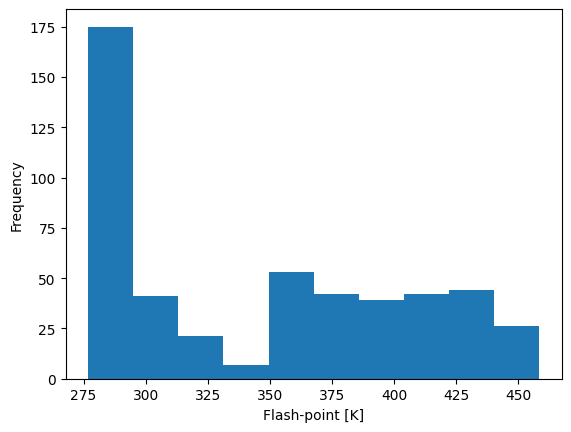

In [4]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(column="FP", legend=False)
plt.xlabel("Flash-point [K]")

plt.show()

Cumulative distribution:

<Figure size 800x600 with 0 Axes>

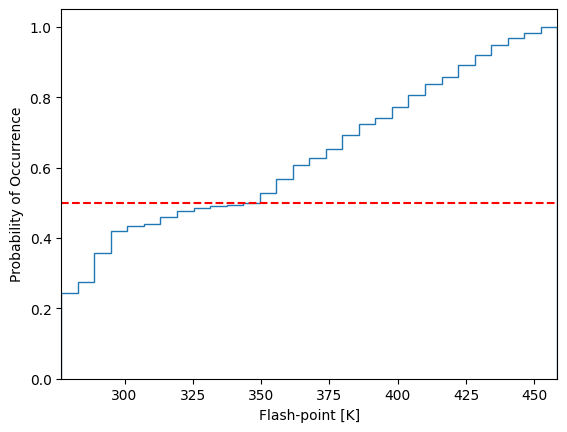

In [5]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(
    column="FP", bins=30, cumulative=True, density=True, histtype="step", legend=False
)

plt.hlines(
    y=0.5, 
    xmin=df_all_data_points.FP.min(), 
    xmax=df_all_data_points.FP.max(), 
    colors='r', 
    linestyles='--'
)

plt.xlim((df_all_data_points.FP.min(), df_all_data_points.FP.max()))

plt.xlabel("Flash-point [K]")
plt.ylabel("Probability of Occurrence")

plt.show()

#### Molar Mass

Histrogram:

<Figure size 800x600 with 0 Axes>

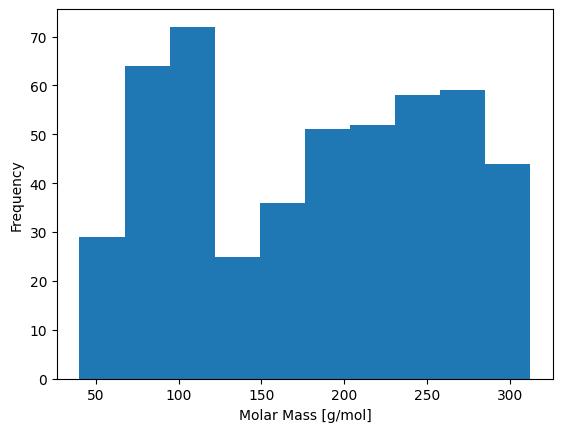

In [6]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(column="MM", legend=False)
plt.xlabel("Molar Mass [g/mol]")

plt.show()

Cumulative distribution:

<Figure size 800x600 with 0 Axes>

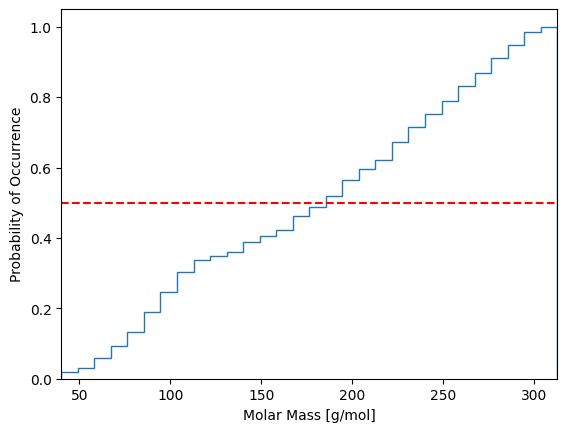

In [7]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(
    column=["MM"], bins=30, cumulative=True, density=True, histtype="step", legend=False
)

plt.hlines(
    y=0.5, 
    xmin=df_all_data_points.MM.min(), 
    xmax=df_all_data_points.MM.max(), 
    colors='r', 
    linestyles='--'
)

plt.xlim((df_all_data_points.MM.min(), df_all_data_points.MM.max()))

plt.xlabel("Molar Mass [g/mol]")
plt.ylabel("Probability of Occurrence")

plt.show()

#### lnPvap

Frequency Histogram:

<Figure size 800x600 with 0 Axes>

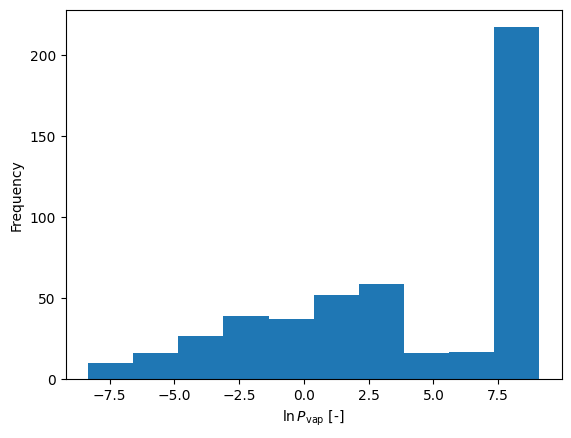

In [8]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(column="lnPvap", legend=False)
plt.xlabel(r"$\ln P_{\text{vap}}$ [-]")

plt.show()

Cumulative probability:

<Figure size 800x600 with 0 Axes>

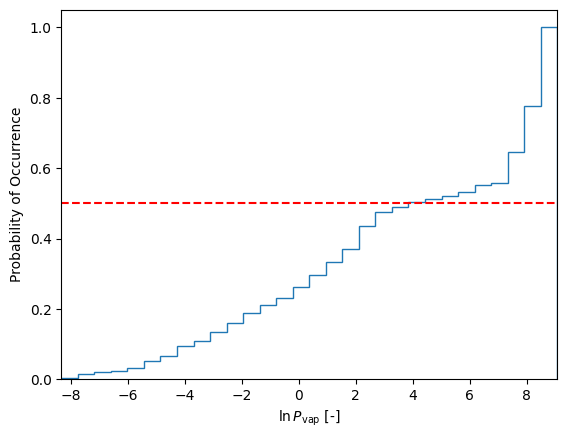

In [9]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(
    column="lnPvap", bins=30, cumulative=True, density=True, histtype="step", legend=False
)

plt.hlines(
    y=0.5, 
    xmin=df_all_data_points.lnPvap.min(), 
    xmax=df_all_data_points.lnPvap.max(), 
    colors='r', 
    linestyles='--'
)

plt.xlim((df_all_data_points.lnPvap.min(), df_all_data_points.lnPvap.max()))

plt.xlabel(r"$\ln P_{\text{vap}}$ [-]")
plt.ylabel("Probability of Occurrence")

plt.show()

#### Number of Carbons

Frequency Histogram:

Check the number of bins (classes) we have to build the histogram by classes:

In [10]:
occurring_number_of_carbons = list(set(df_all_data_points['NC'].unique()))

number_classes_nc = len(occurring_number_of_carbons)

print(f"All number of carbons occurring in the dataset: {occurring_number_of_carbons}")
print(f"Total number of classes of different number of carbons: {number_classes_nc}")

All number of carbons occurring in the dataset: [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Total number of classes of different number of carbons: 18


<Figure size 800x600 with 0 Axes>

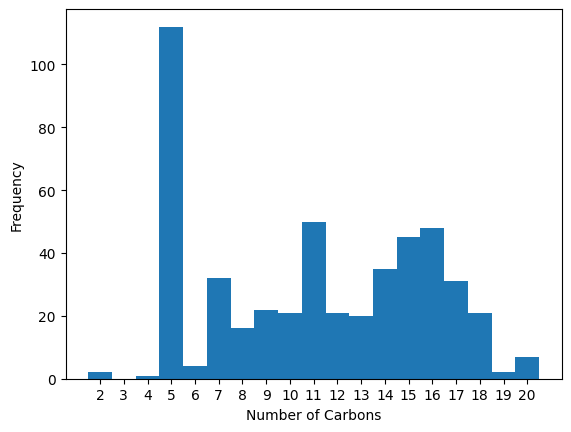

In [11]:
plt.figure(figsize=(8, 6))

# Calculate the bins to have have the classes properly centered in x-axis
min_nc = df_all_data_points["NC"].min()
max_nc = df_all_data_points["NC"].max()
bins = np.arange(min_nc - 0.5, max_nc + 1.5, 1)

df_all_data_points.plot.hist(column="NC", bins=bins, legend=False)

# A trick to have the bins centralized related to the x-axis classes
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.xticks(bin_centers)

plt.xlabel("Number of Carbons")

plt.show()

Cumulative probability:

<Figure size 800x600 with 0 Axes>

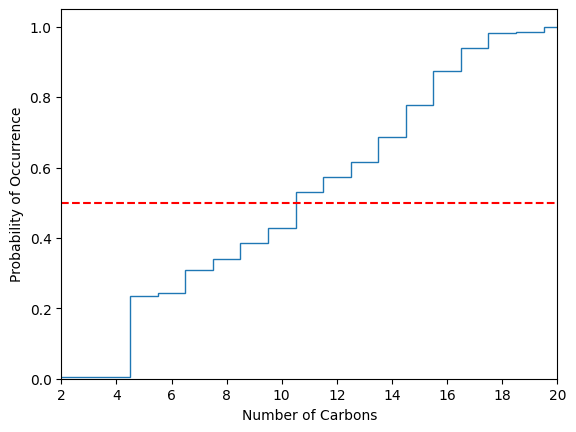

In [12]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(
    column="NC", bins=bins, cumulative=True, density=True, histtype="step", legend=False
)

plt.hlines(
    y=0.5, 
    xmin=df_all_data_points.NC.min(), 
    xmax=df_all_data_points.NC.max(), 
    colors='r', 
    linestyles='--'
)

plt.xlim((df_all_data_points.NC.min(), df_all_data_points.NC.max()))

plt.xlabel("Number of Carbons")
plt.ylabel("Probability of Occurrence")

plt.show()

#### Number of C=C bonds

Check the number of bins (classes) we have to build the histogram by classes:

In [13]:
occurring_number_of_double_bonds = list(set(df_all_data_points['C=C'].unique()))

number_classes_double_bonds = len(occurring_number_of_double_bonds)

print(f"All number of carbons occurring in the dataset: {occurring_number_of_double_bonds}")
print(f"Total number of classes of different number of carbons: {number_classes_double_bonds}")

All number of carbons occurring in the dataset: [0, 1, 2, 3]
Total number of classes of different number of carbons: 4


Frequency histogram:

<Figure size 800x600 with 0 Axes>

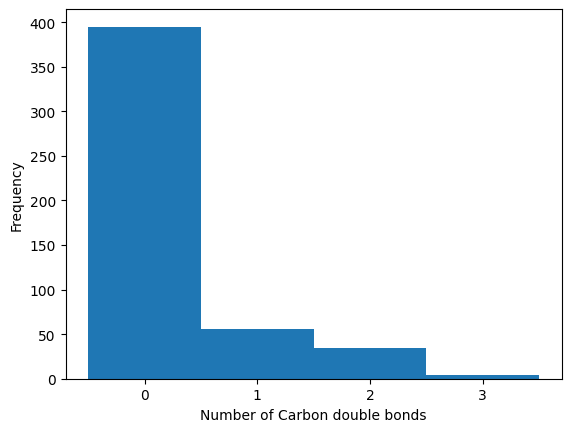

In [14]:
plt.figure(figsize=(8, 6))

# Calculate the bins to have have the classes properly centered in x-axis
min_nc = df_all_data_points["C=C"].min()
max_nc = df_all_data_points["C=C"].max()
bins = np.arange(min_nc - 0.5, max_nc + 1.5, 1)

df_all_data_points.plot.hist(column="C=C", bins=bins, legend=False)

# A trick to have the bins centralized related to the x-axis classes
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.xticks(bin_centers)

plt.xlabel("Number of Carbon double bonds")

plt.show()

Density probability:

<Figure size 800x600 with 0 Axes>

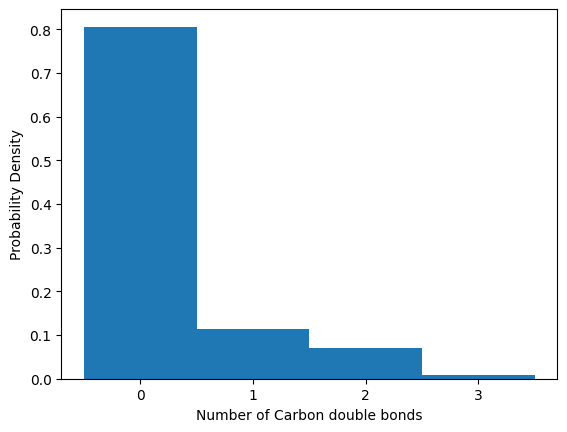

In [15]:
plt.figure(figsize=(8, 6))

# Calculate the bins to have have the classes properly centered in x-axis
min_nc = df_all_data_points["C=C"].min()
max_nc = df_all_data_points["C=C"].max()
bins = np.arange(min_nc - 0.5, max_nc + 1.5, 1)

df_all_data_points.plot.hist(column="C=C", bins=bins, legend=False, density=True)

# A trick to have the bins centralized related to the x-axis classes
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.xticks(bin_centers)

plt.xlabel("Number of Carbon double bonds")
plt.ylabel("Probability Density")

plt.show()

Cumulative probability (does not make sense in this case, there are too few classes):

<Figure size 800x600 with 0 Axes>

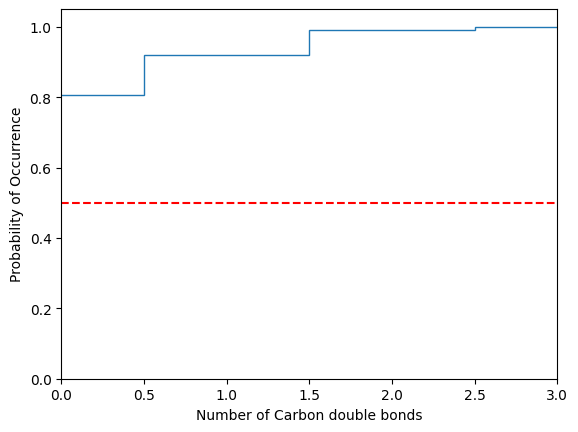

In [16]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(
    column="C=C", bins=bins, cumulative=True, density=True, histtype="step", legend=False
)

plt.hlines(
    y=0.5, 
    xmin=df_all_data_points['C=C'].min(), 
    xmax=df_all_data_points['C=C'].max(), 
    colors='r', 
    linestyles='--'
)

plt.xlim((df_all_data_points['C=C'].min(), df_all_data_points['C=C'].max()))

plt.xlabel("Number of Carbon double bonds")
plt.ylabel("Probability of Occurrence")

plt.show()

#### Base entropy of the system

This quantity is the elemental entropy calculated based on each element that composes the molecules in the system (regardless of molar fractions of the components). The element entropy values are collected from [this CHNOSZ table](https://github.com/jedick/CHNOSZ/blob/main/inst/extdata/thermo/element.csv).

Frequency histogram:

<Figure size 800x600 with 0 Axes>

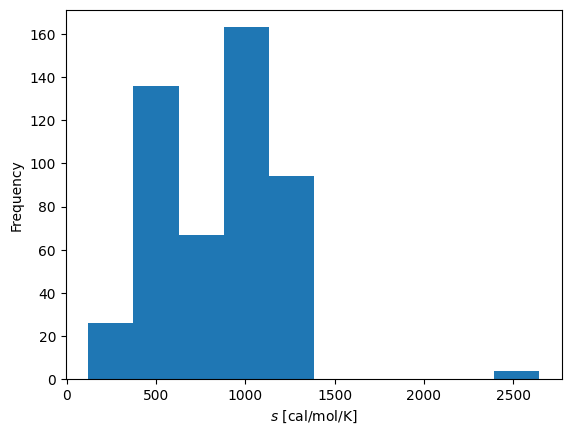

In [17]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(column="s", legend=False)
plt.xlabel(r"$s$ [cal/mol/K]")

plt.show()

Cumulative probability:

<Figure size 800x600 with 0 Axes>

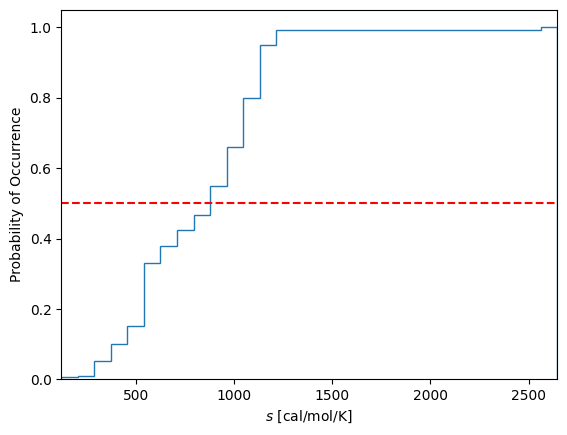

In [18]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(
    column="s", bins=30, cumulative=True, density=True, histtype="step", legend=False
)

plt.hlines(
    y=0.5, 
    xmin=df_all_data_points.s.min(), 
    xmax=df_all_data_points.s.max(), 
    colors='r', 
    linestyles='--'
)

plt.xlim((df_all_data_points.s.min(), df_all_data_points.s.max()))

plt.xlabel(r"$s$ [cal/mol/K]")
plt.ylabel("Probability of Occurrence")

plt.show()

#### Systems

Check the number of bins (classes) we have to build the histogram by classes:

In [19]:
occurring_number_of_systems = list(set(df_all_data_points['System'].unique()))

number_classes_systems = len(occurring_number_of_systems)

print(f"All number of systems occurring in the dataset: {occurring_number_of_systems}")
print(f"Total number of classes of different systems: {number_classes_systems}")

All number of systems occurring in the dataset: ['Methyl Stearate', 'Propyl Acetate', 'Propyl Acetate + Ethanol + Octane', 'Methyl Palmitate', 'Methyl Butyrate + Ethanol', 'Ethyl Decanoate', 'Ethyl Decanoate + Ethyl Myristate', 'Ethyl Myristate', 'Ethanol +Ethyl Palmitate', 'Methyl Butyrate', 'Butanol + Ethyl Laurate', 'Methyl Octanoate + Methyl Stearate', 'Ethyl Octanoate + Ethyl Stearate', 'Dodecane + Ethyl Octanoate', 'Ethyl Myristate + Ethyl Palmitate', 'Ethyl Laurate + Ethyl Stearate', 'Ethanol + Dodecane + Ethyl Decanoate', 'Methyl Octanoate', 'Methyl Decanoate + Methyl Oleate', 'Butanol + Ethyl Decanoate', 'Ethyl Laurate + Ethyl Myristate', 'Dodecane + Ethyl Oleate', 'Dodecane + Ethyl Stearate', 'Ethyl Myristate + Ethyl Linoleate', 'Ethanol + Dodecane + Ethyl Oleate', 'Methyl Decanoate + Methyl Stearate', 'Ethyl Octanoate', 'Ethyl Octanoate + Ethyl Myristate', 'Dodecane + Ethyl Laurate', 'Dodecane + Ethyl Palmitate', 'Ethyl Oleate', 'Dodecane', 'Butanol + Ethyl Octanoate', 'Etha

Frequency histogram:

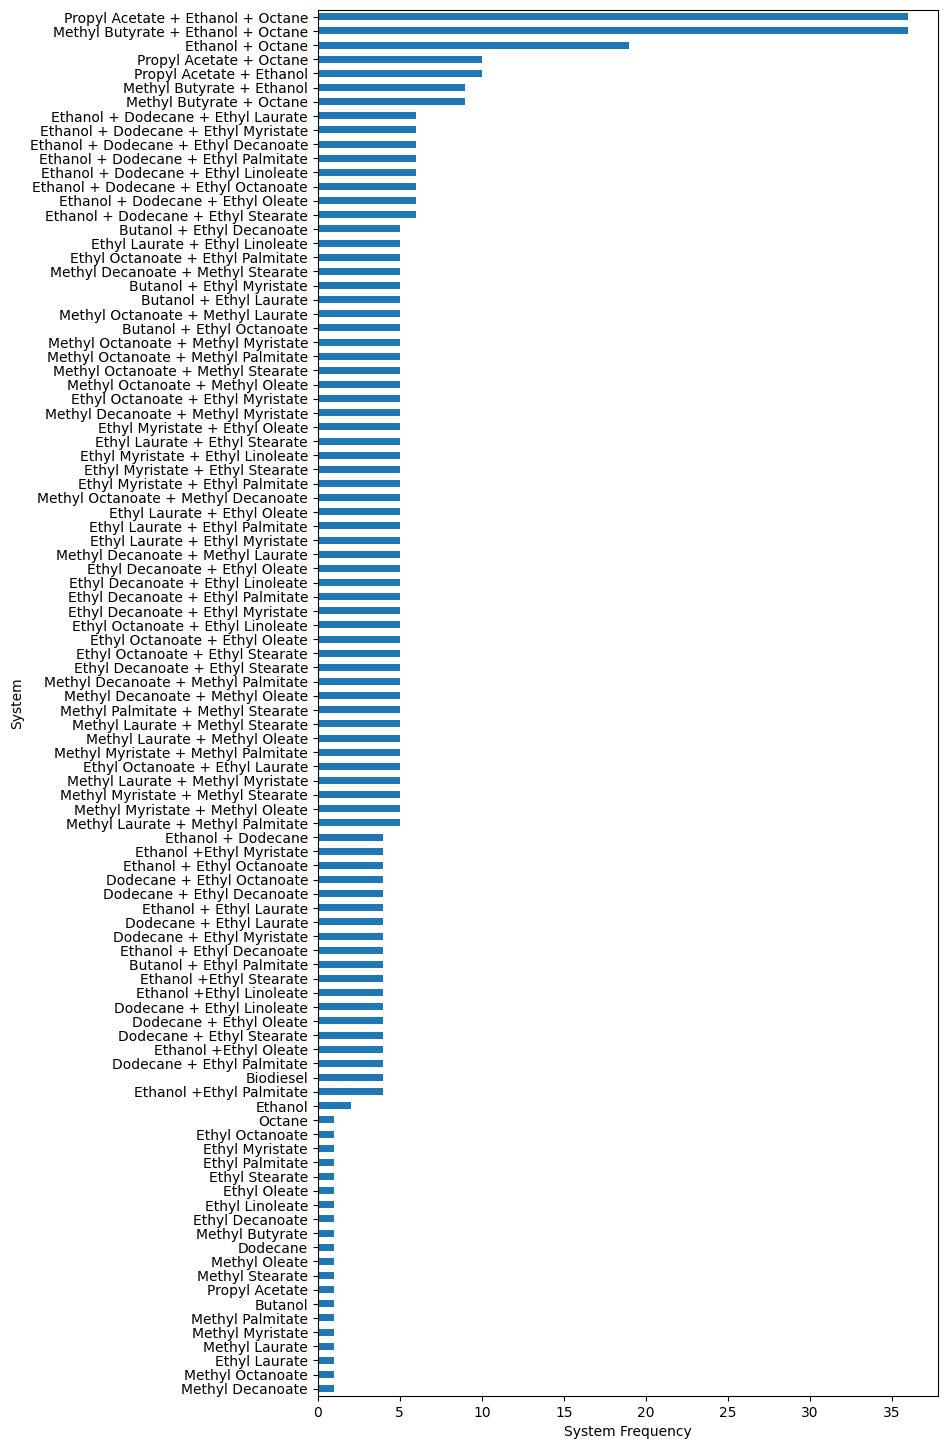

In [20]:
plt.figure(figsize=(8, 18))

df_all_data_points['System'].value_counts().sort_values(ascending=True).plot.barh(legend=False, width=0.5)

plt.xlabel("System Frequency")

plt.show()

Data imbalance distribution as percentages of each system:

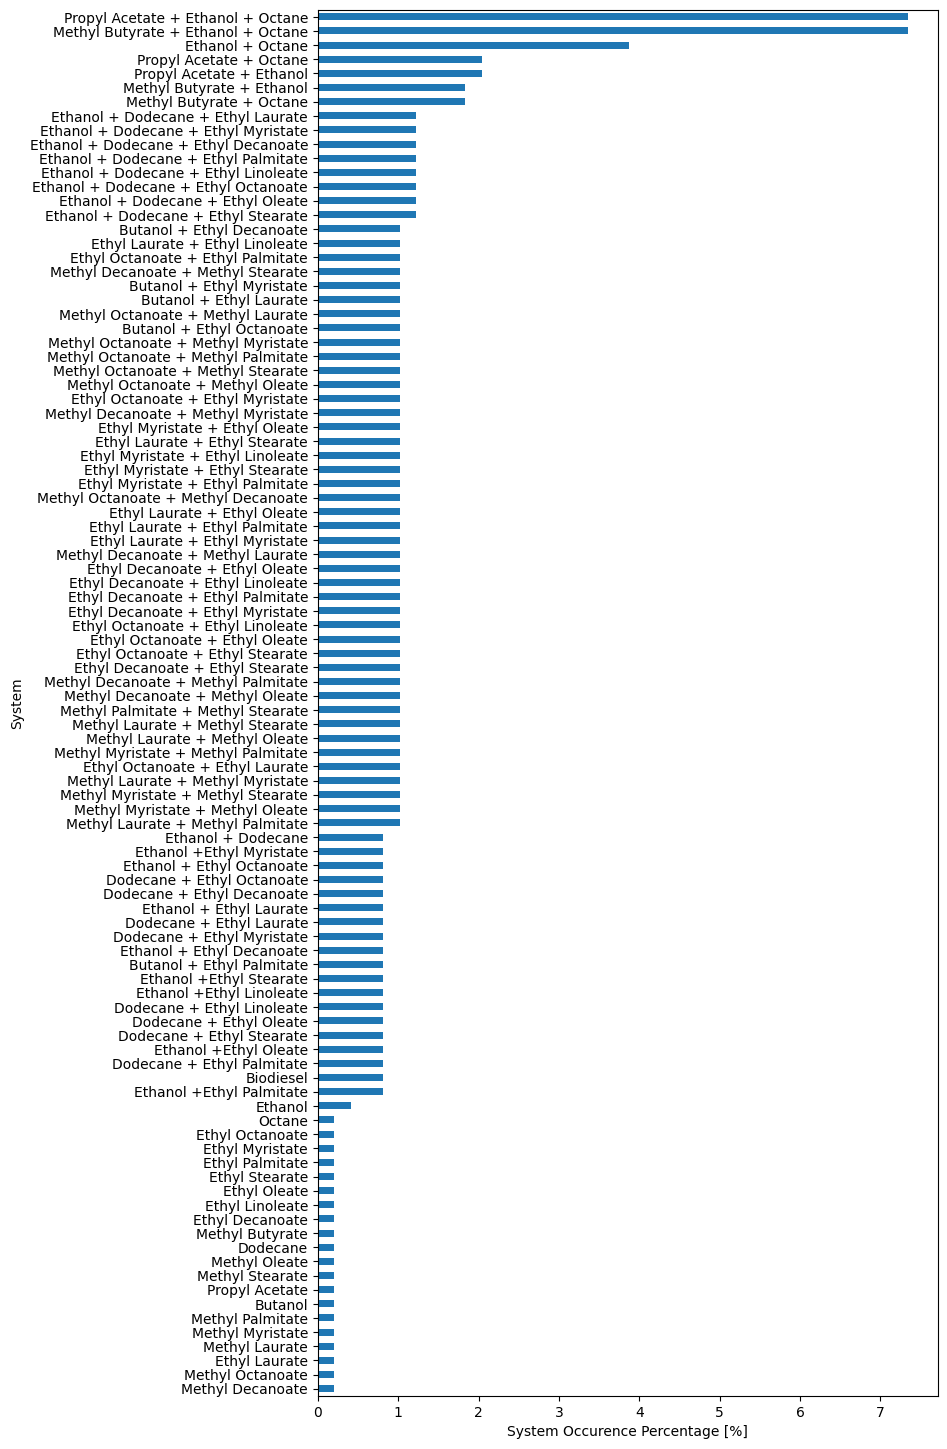

In [21]:
df_systems = df_all_data_points['System'].copy(deep=True)

df_systems_categories_percentages = df_systems.value_counts(normalize=True).sort_values(ascending=True) * 100

plt.figure(figsize=(8, 18))

df_systems_categories_percentages.plot.barh(legend=False, width=0.5)

plt.xlabel("System Occurence Percentage [%]")

plt.show()

In [22]:
df_systems_categories_percentages

System
Methyl Decanoate                      0.204082
Methyl Octanoate                      0.204082
Ethyl Laurate                         0.204082
Methyl Laurate                        0.204082
Methyl Myristate                      0.204082
                                        ...   
Propyl Acetate + Ethanol              2.040816
Propyl Acetate + Octane               2.040816
Ethanol + Octane                      3.877551
Methyl Butyrate + Ethanol + Octane    7.346939
Propyl Acetate + Ethanol + Octane     7.346939
Name: proportion, Length: 98, dtype: float64

### Correlation Analysis

The goal of this analysis is two-fold:

* Check for linear correlations between different parameters/features (Pearson correlation);
* Check for monotonic (allowing non-linear) correlations between different parameters/features (Spearman correlation).

However, this kind of analysis can be performed only on numerical features.

In [23]:
df_numerical_features = df_all_data_points.drop(columns=['System', 'Method']).copy()

df_numerical_features

,FP,MM,lnPvap,NC,C=C,s
0,374.70,186.29,1.83,11,0,407.7000
1,370.60,183.49,2.44,10,0,750.2000
2,365.60,180.68,2.82,10,0,750.2000
3,360.60,175.07,3.31,10,0,750.2000
4,354.60,169.46,3.64,10,0,750.2000
...,...,...,...,...,...,...
485,346.88,238.19,4.62,10,0,756.8853
486,315.92,116.19,6.70,11,0,822.0956
487,319.28,158.26,6.41,11,0,822.0956
488,322.64,200.33,6.01,11,0,822.0956


#### Linear Correlation

In [24]:
df_data_linear_corr = df_numerical_features.corr(method='pearson')

df_data_linear_corr

,FP,MM,lnPvap,NC,C=C,s
FP,1.000000,0.927512,-0.986199,0.929252,0.309695,0.660977
MM,0.927512,1.000000,-0.899834,0.940352,0.388145,0.729886
lnPvap,-0.986199,-0.899834,1.000000,-0.912103,-0.314199,-0.651643
NC,0.929252,0.940352,-0.912103,1.000000,0.434131,0.786373
C=C,0.309695,0.388145,-0.314199,0.434131,1.000000,0.481319
s,0.660977,0.729886,-0.651643,0.786373,0.481319,1.000000


<Axes: >

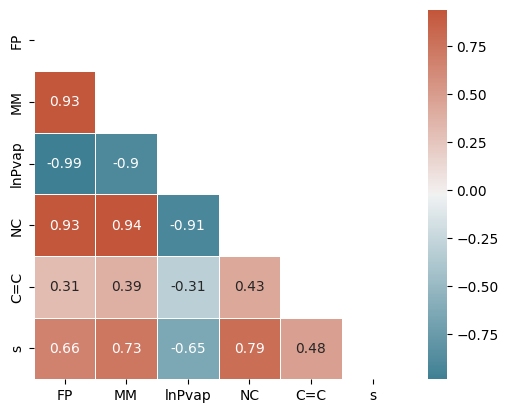

In [25]:
# Use a diverging palette to help the interpretation
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Mask to drop duplicated values due to corr symmetry
symmetry_mask = np.triu(np.ones_like(df_data_linear_corr, dtype=bool))

sns.heatmap(
    df_data_linear_corr, mask=symmetry_mask, cmap=cmap, square=True, linewidths=.5, annot=True
)

#### Monotonic Correlation

In [26]:
df_data_monotonic_corr = df_numerical_features.corr(method='spearman')

df_data_monotonic_corr

,FP,MM,lnPvap,NC,C=C,s
FP,1.000000,0.938839,-0.954137,0.942320,0.334912,0.710798
MM,0.938839,1.000000,-0.940734,0.934084,0.418246,0.759947
lnPvap,-0.954137,-0.940734,1.000000,-0.919444,-0.312757,-0.703727
NC,0.942320,0.934084,-0.919444,1.000000,0.458715,0.820840
C=C,0.334912,0.418246,-0.312757,0.458715,1.000000,0.427064
s,0.710798,0.759947,-0.703727,0.820840,0.427064,1.000000


<Axes: >

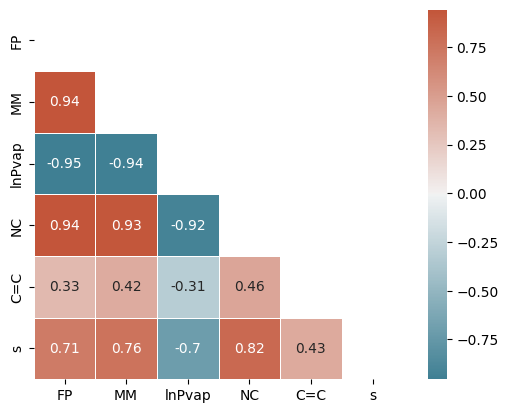

In [27]:
# Mask to drop duplicated values due to corr symmetry
symmetry_mask = np.triu(np.ones_like(df_data_monotonic_corr, dtype=bool))

sns.heatmap(
    df_data_monotonic_corr, mask=symmetry_mask, cmap=cmap, square=True, linewidths=.5, annot=True
)

#### Checking visually

We now check visually how the features correlate with FP (flash-point), which is our quantity of interest in this study.

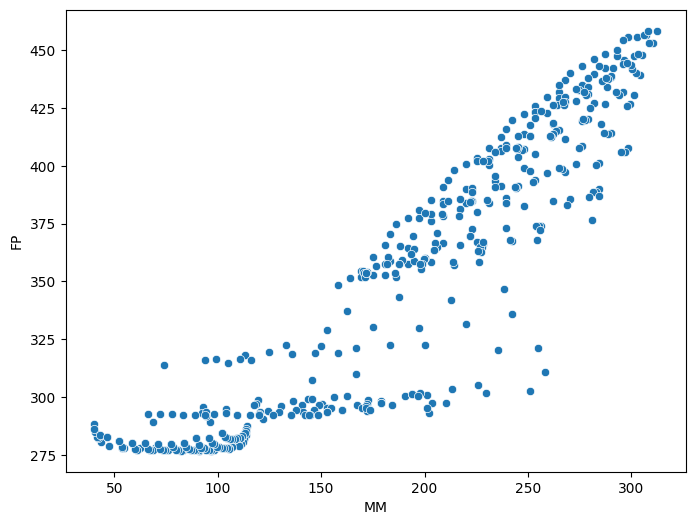

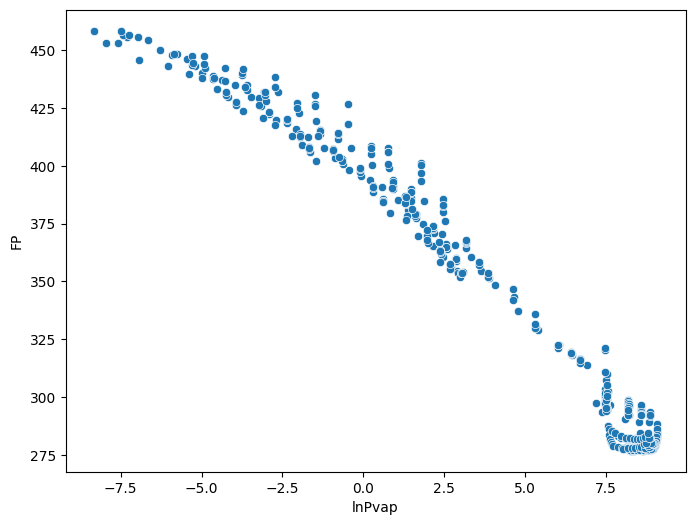

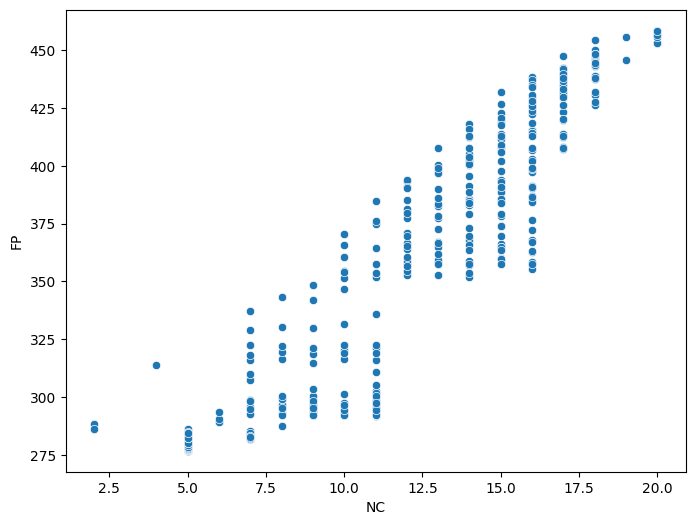

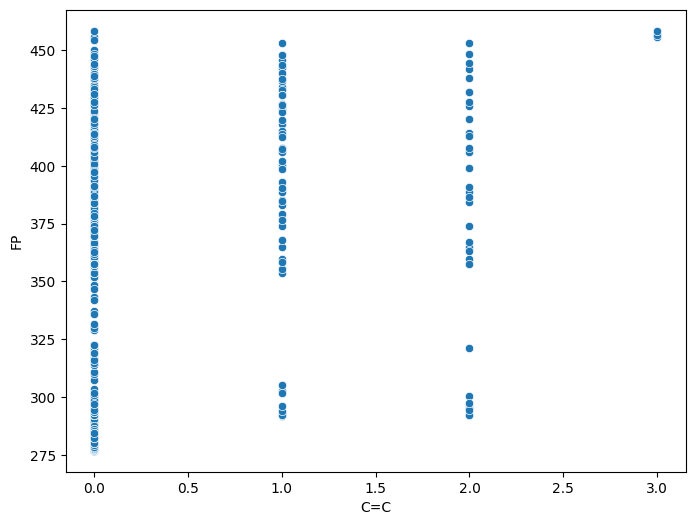

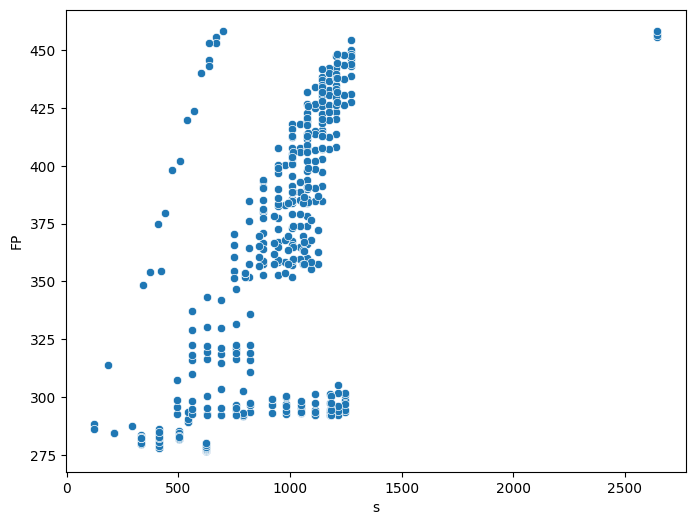

In [28]:
for feature in df_numerical_features.columns:
    if feature == 'FP':
        continue
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_numerical_features, x=feature, y='FP')
    plt.show()

#### Remarks

From the correlation analysis, it is clear that 3 properties/features correlate to the flash-point:

* Molar Mass of the system (MM);
* lnPvap of the system;
* Number of Carbons of the system (NC).

However, these properties are also well correlated in the performed analysis, suggesting that at least one of them should be removed as input feature in a Neural Network analysis, for instance. Let's check how MM correlates with lnPvap:

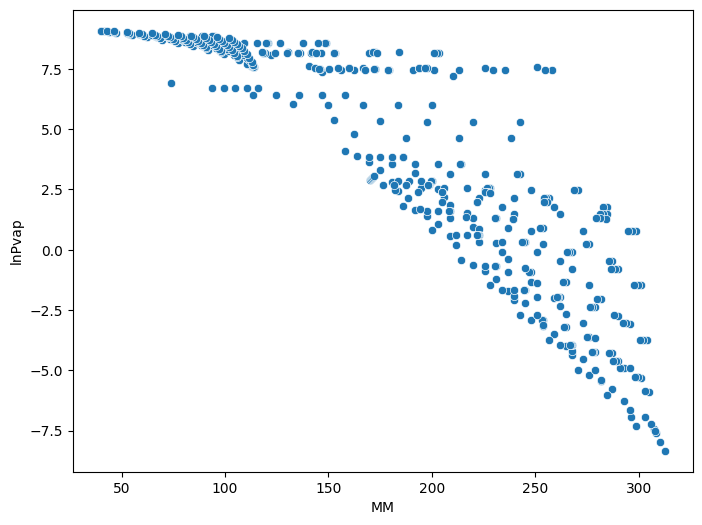

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_numerical_features, x='MM', y='lnPvap')
plt.show()

MM vs NC:

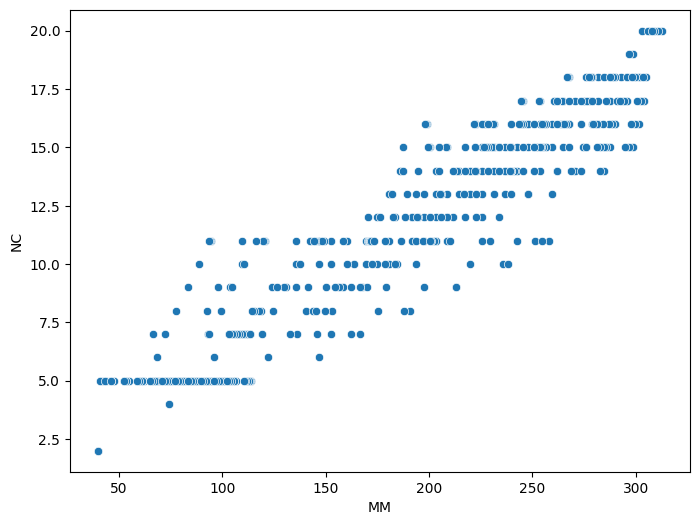

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_numerical_features, x='MM', y='NC')
plt.show()

NC vs lnPvap:

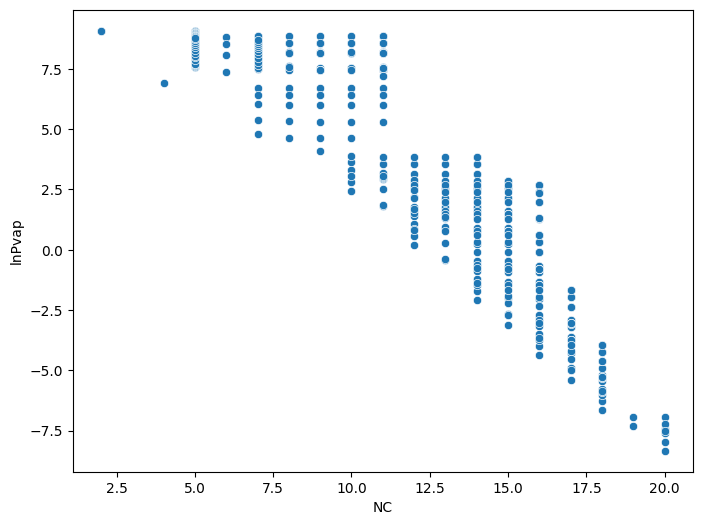

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_numerical_features, x='NC', y='lnPvap')
plt.show()

To put everything together, i.e., considering all numerical features, let's make a pair-plot analysis. The goal is to check whether we have mass points pairwisely in the dataset. This kind of evaluation are only possible to be performed on numerical features only since it is scale-dependent.

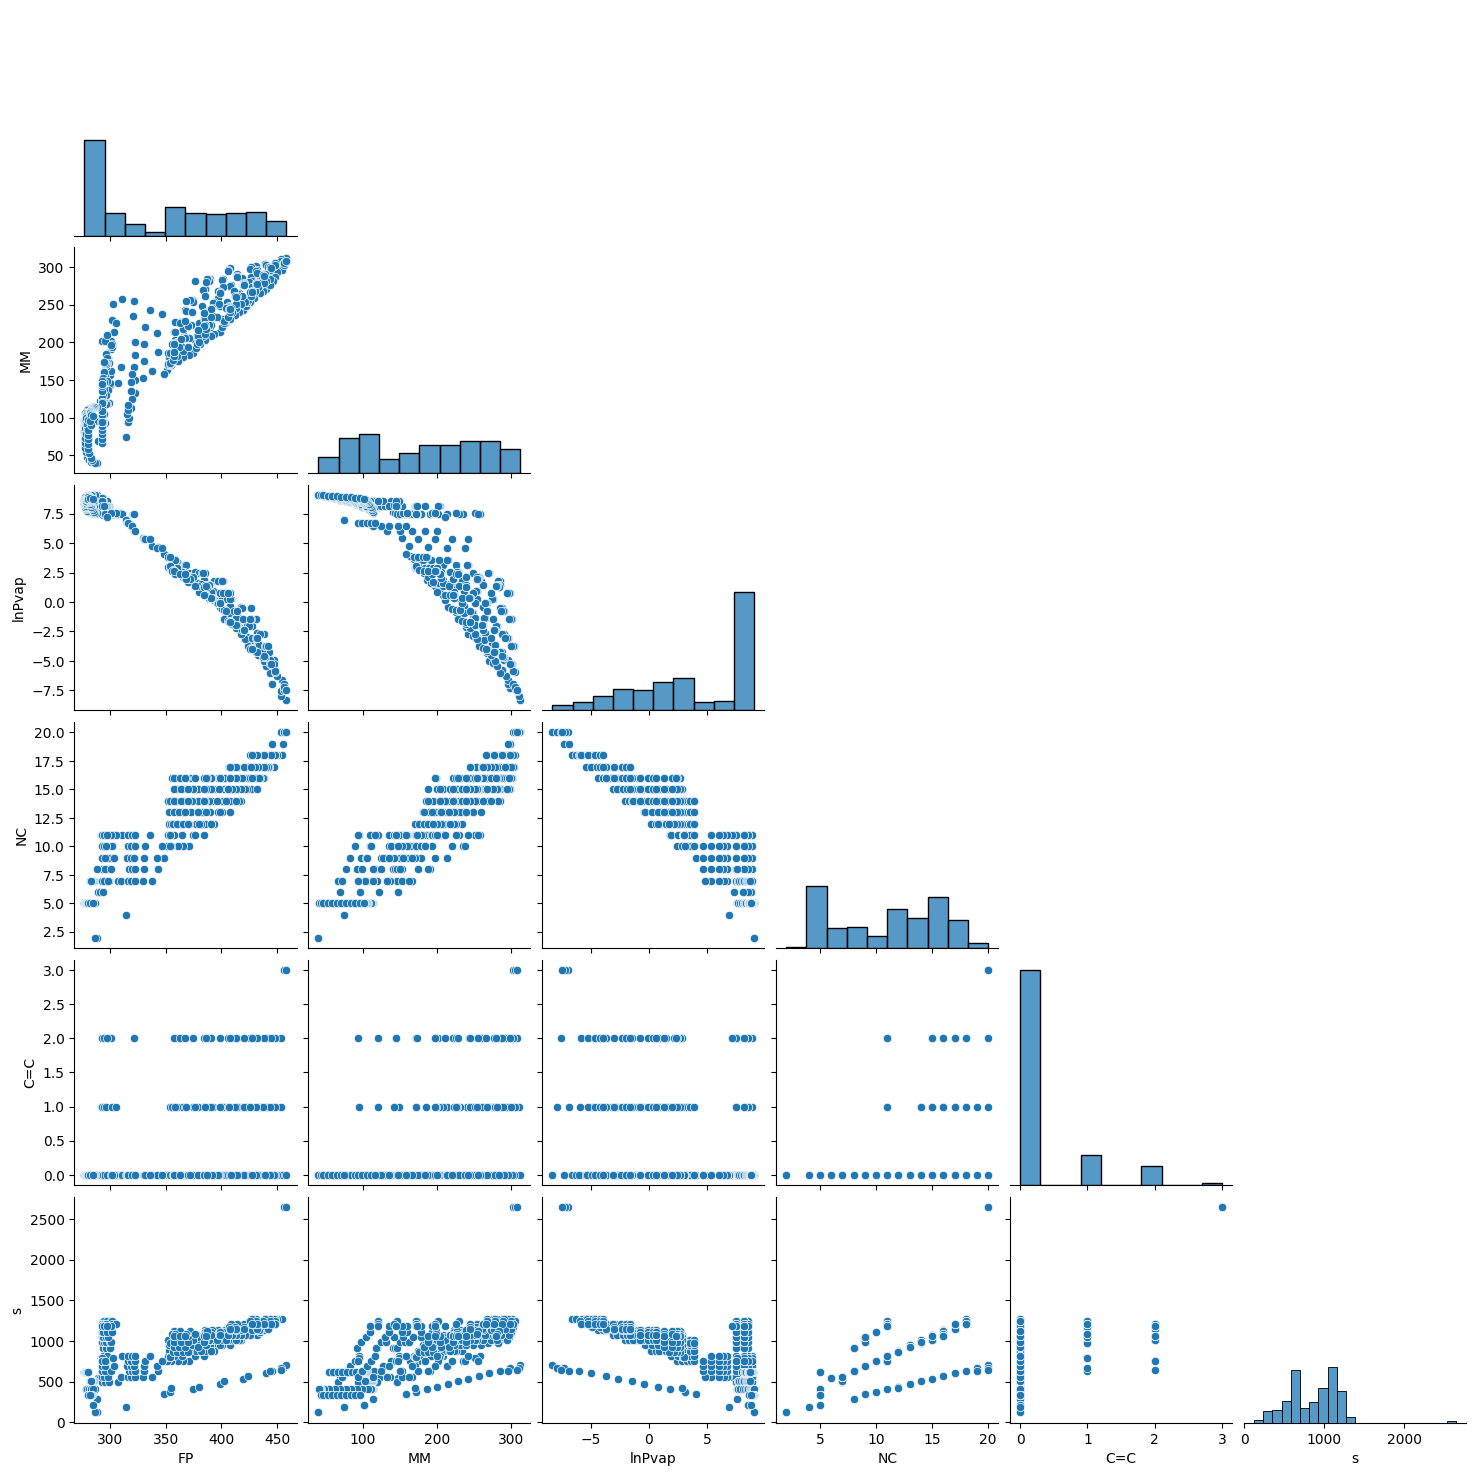

In [32]:
sns.pairplot(df_numerical_features, corner=True)

Since NC is not a continuous (float) parameter, dropping this feature seems as a natural choice. The feature that best correlates with FP is the lnPvap. Two possible NN can be considered based on the investigation performed here:

* Use both lnPvap and MM as input features in a NN model to predict FP;
* Use only lnPvap to predict FP with a NN model;
* Still, it would be valid to try both lnPvap and NC as input features in the NN model since the dispersion over FP for a fixed NC value looks smaller than for a fixed MM in the FP vs MM plot.